<a href="https://colab.research.google.com/github/dcantu88/FoodHub/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Print the columns
print("Columns")
print(df.columns)
print()

(1898, 9)

In [ ]:
# Print all the rows
print("Rows")
print(df)
print()

In [ ]:
# Print the message about dataset dimensions
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset has 1898 rows and 9 columns


In [ ]:
# Make sure previous print statements are correct
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Datatypes of the different columns are int64, object and float64

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing values
missing_values = df.isna()
display(missing_values)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values
missing_values = df.isna()

#Check if missing values exist in any cell of the DataFrame
if missing_values.any().any():
    print("There are missing values in the data.")
    print("Missing values by column:")
    print("Missing_values")
    # Treat missing values using an appropriate method
    # For example, filling missing values with the mean for numeric columns
    df.fillna(df.mean(), inplace=True)  # Replace NaN values with the mean of each column
    print("Missing values treated using mean value.")
else:
    print("There are no missing values in the data.")

There are no missing values in the data.


#### Observations:
There are no missing values in the data in the DataFrame

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Check the statistical summary of the data
summary = df['food_preparation_time'].describe()

#Get minimum, average, and maximum time
min_time = summary['min']
avg_time = summary['mean']
max_time = summary['max']

#Print the results
print("Statistical Summary of Food Preparation Time:")
print(summary)
print()
print("Minimum time for food preparation:", min_time)
print("Average time for food preparation:", avg_time)
print("Maximum time for food preparation:", max_time)

Statistical Summary of Food Preparation Time:
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Minimum time for food preparation: 20.0
Average time for food preparation: 27.371970495258168
Maximum time for food preparation: 35.0


#### Observations:
Minimum time for food preparation: 20.0

Average time for food preparation: 27.371970495258168

Maximum time for food preparation: 35.0

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the number of orders that are not rated
unrated_orders = df['rating'].isnull().sum()

#Print the result
print("Number of orders not rated:", unrated_orders)

Number of orders not rated: 0


#### Observations:
Number of orders not rated: 0

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

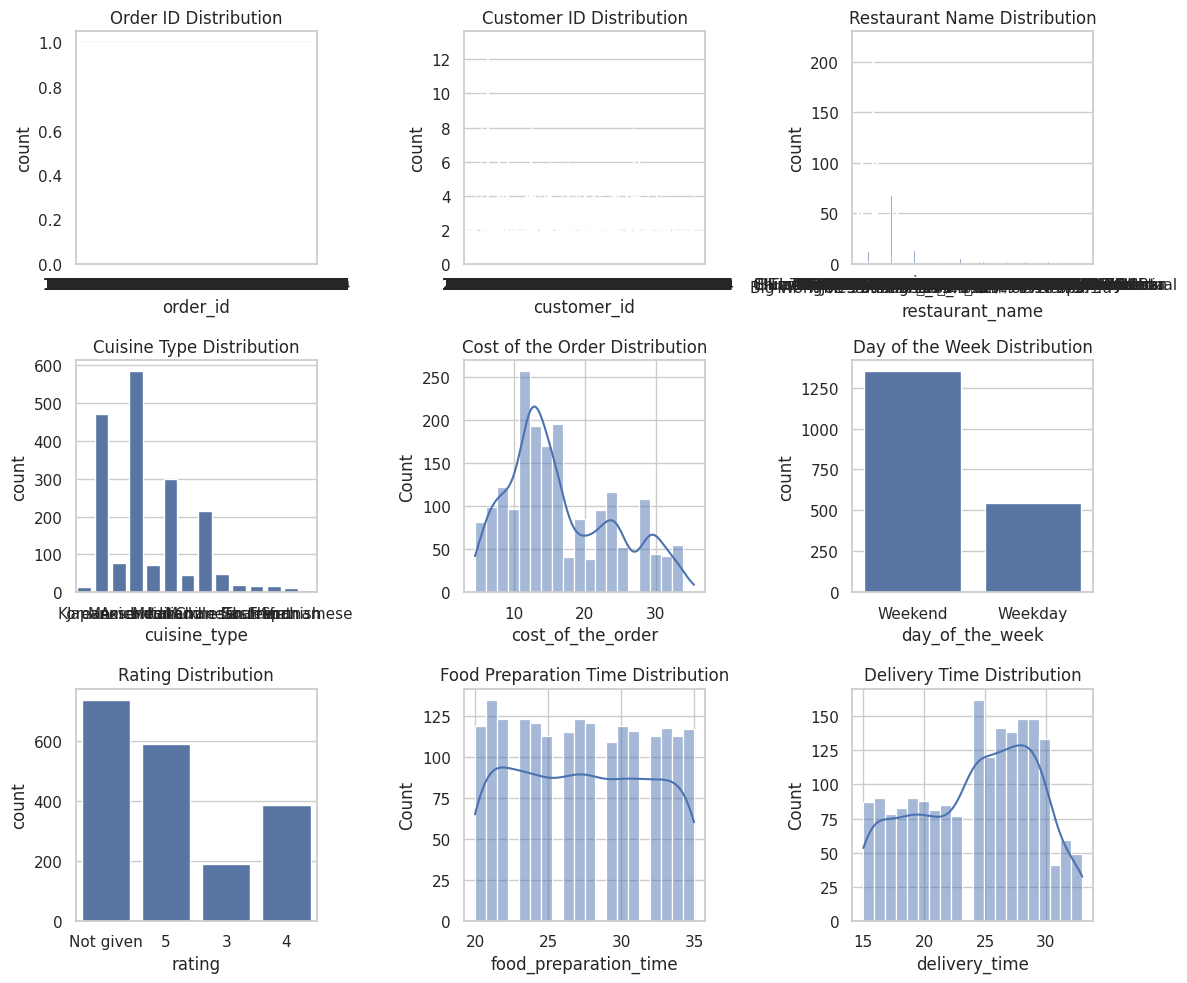

In [ ]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Style for Seaborn plots
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

#Plotting the distribution
plt.figure(figsize=(12,10))

# order_id distribution
plt.subplot(3,3,1)
sns.countplot(data=df, x='order_id')
plt.title('Order ID Distribution')

#customer_id Distribution
plt.subplot(3,3,2)
sns.countplot(data=df, x='customer_id')
plt.title('Customer ID Distribution')

#Restaurant Name distribution
plt.subplot(3,3,3)
sns.countplot(data=df, x='restaurant_name')
plt.title('Restaurant Name Distribution')

#cuisine_type distribution
plt.subplot(3,3,4)
sns.countplot(data=df, x='cuisine_type')
plt.title('Cuisine Type Distribution')

# cost_of_the_order distribution
plt.subplot(3, 3, 5)
sns.histplot(data=df, x='cost_of_the_order', bins=20, kde=True)
plt.title('Cost of the Order Distribution')

# day_of_the_week distribution
plt.subplot(3, 3, 6)
sns.countplot(data=df, x='day_of_the_week')
plt.title('Day of the Week Distribution')

# rating distribution
plt.subplot(3, 3, 7)
sns.countplot(data=df, x='rating')
plt.title('Rating Distribution')

# food_preparation_time distribution
plt.subplot(3, 3, 8)
sns.histplot(data=df, x='food_preparation_time', bins=20, kde=True)
plt.title('Food Preparation Time Distribution')

# delivery_time distribution
plt.subplot(3, 3, 9)
sns.histplot(data=df, x='delivery_time', bins=20, kde=True)
plt.title('Delivery Time Distribution')

plt.tight_layout()
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Count the number of orders for each restaurant
restaurant_orders = df.groupby('restaurant_name')['order_id'].count()

# Sort the restaurants based on the number of orders in descending order
top_restaurants = restaurant_orders.sort_values(ascending=False)

# Top 5 restaurants
top_5_restaurants = top_restaurants.head(5)

# Print the top 5 restaurants
print("Top 5 restaurants in terms of the number of orders received:")
print(top_5_restaurants)


Top 5 restaurants in terms of the number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


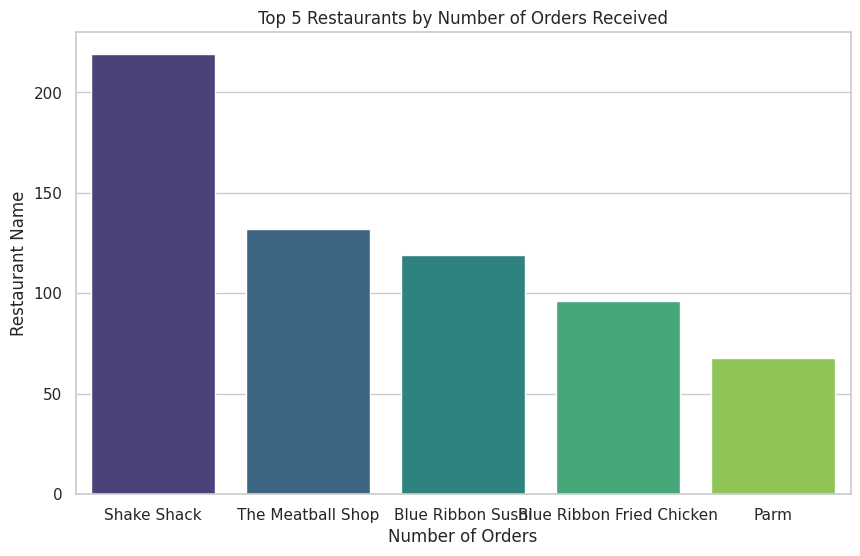

In [ ]:
# Plotting the top 5 restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_restaurants.index, y=top_5_restaurants.values, palette='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.title('Top 5 Restaurants by Number of Orders Received')
plt.show()

#### Observations:
Top 5 restaurants in terms of the number of orders received:

Shake Shack                  219

The Meatball Shop            132

Blue Ribbon Sushi            119

Blue Ribbon Fried Chicken     96

Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Display all values under the 'day_of_the_week' column
print(df['day_of_the_week'])

0       Weekend
1       Weekend
2       Weekday
3       Weekend
4       Weekday
         ...   
1893    Weekend
1894    Weekend
1895    Weekday
1896    Weekday
1897    Weekend
Name: day_of_the_week, Length: 1898, dtype: object


In [ ]:
# Orders placed on weekends (Saturday and Sunday)
weekend_orders = df[df['day_of_the_week'].isin(['Weekend'])]

if not weekend_orders.empty:
    # Unique cuisine types
    unique_cuisines = np.unique(weekend_orders['cuisine_type'])

    # NumPy array to store the counts of orders for each cuisine type
    order_counts = np.zeros(len(unique_cuisines), dtype=int)

    # Iterate over each unique cuisine type
    for i, cuisine in enumerate(unique_cuisines):
        # Count the number of orders for the current cuisine type
        order_counts[i] = np.sum(weekend_orders['cuisine_type'] == cuisine)

    if len(order_counts) > 0:
        # cuisine type with the maximum number of orders
        most_popular_index = np.argmax(order_counts)

        # most popular cuisine type
        most_popular_cuisine = unique_cuisines[most_popular_index]

        #Most popular cuisine on weekends
        print("The most popular cuisine on weekends is:", most_popular_cuisine)
    else:
        print("No orders were placed on weekends.")
else:
    print("No orders were placed on weekends.")


The most popular cuisine on weekends is: American


#### Observations:
The most popular cuisine on weekends is: American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

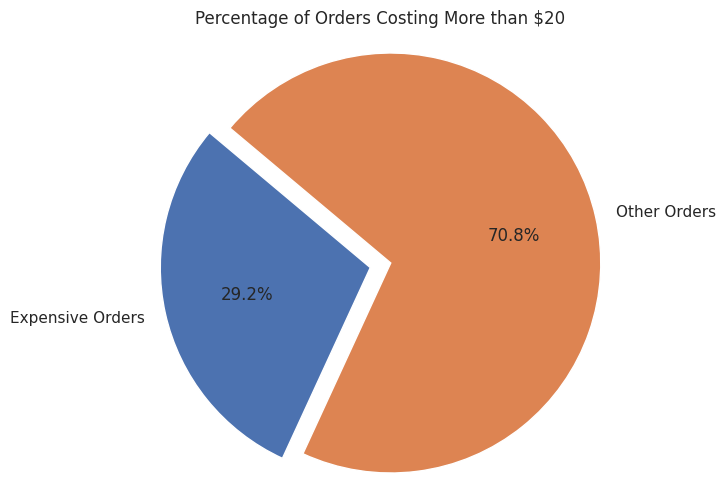

In [ ]:
# orders with a cost greater than $20
expensive_orders = df[df['cost_of_the_order'] > 20]

#Total number of orders that cost more than $20
expensive_orders_count = len(expensive_orders)

# total number of orders
total_orders_count = len(df)

# percentage of orders that cost more than $20
percentage_expensive_orders = (expensive_orders_count / total_orders_count) * 100

# Create a chart for the results
labels = ['Expensive Orders', 'Other Orders']
sizes = [percentage_expensive_orders, 100 - percentage_expensive_orders]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Orders Costing More than $20')
plt.axis('equal')
plt.show()

#### Observations:
29.2% of orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

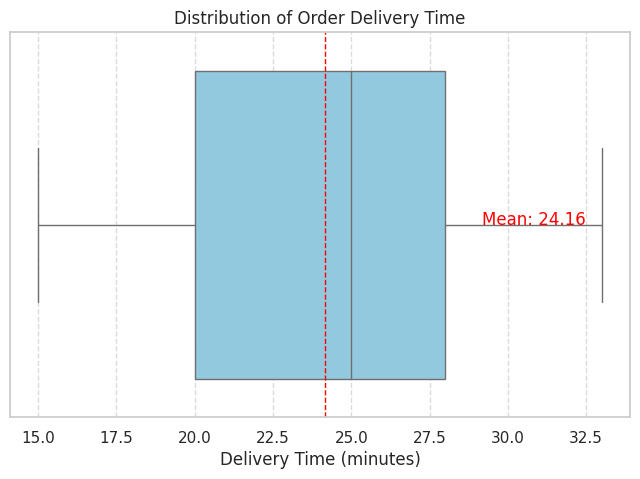

In [ ]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

# Create a box plot of order delivery time with Seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df['delivery_time'], orient='h', color='skyblue')
plt.xlabel('Delivery Time (minutes)')
plt.title('Distribution of Order Delivery Time')
plt.axvline(mean_delivery_time, color='red', linestyle='dashed', linewidth=1)  # Add a vertical line for the mean
plt.text(mean_delivery_time + 5, 0, f'Mean: {mean_delivery_time:.2f}', color='red')  # Annotate the mean value
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add vertical gridlines
plt.show()

#### Observations:
The mean delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

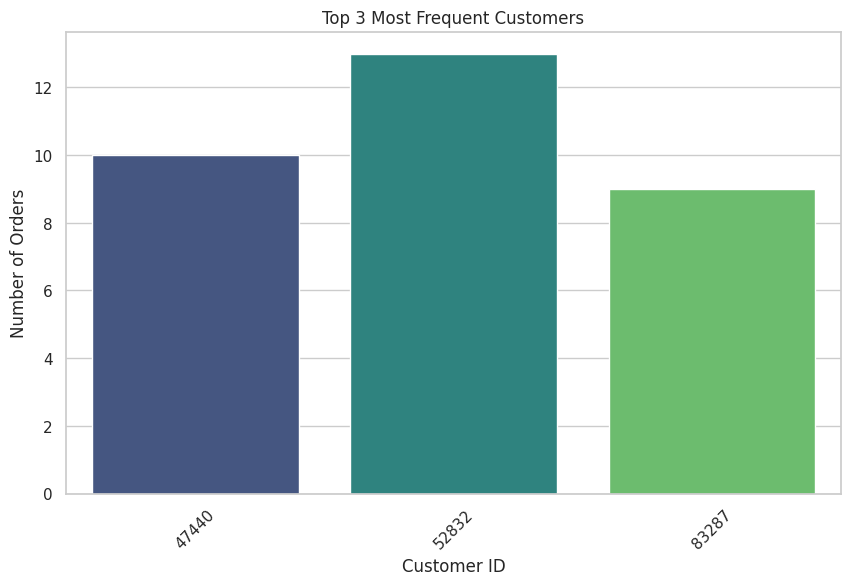

Top 3 Most Frequent Customers and Their Number of Orders:
Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


In [ ]:
# orders placed by each customer
customer_orders = df['customer_id'].value_counts()

# Customers based on the number of orders in descending order
top_customers = customer_orders.head(3)

#top 3 customers and their number of orders
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top 3 Most Frequent Customers')
plt.xticks(rotation=45)
plt.show()

# IDs of the top 3 customers and the number of orders they placed
print("Top 3 Most Frequent Customers and Their Number of Orders:")
for customer_id, num_orders in top_customers.items():
    print(f"Customer ID: {customer_id}, Number of Orders: {num_orders}")

#### Observations:
Top 3 Most Frequent Customers and Their Number of Orders:

Customer ID: 52832, Number of Orders: 13

Customer ID: 47440, Number of Orders: 10

Customer ID: 83287, Number of Orders: 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


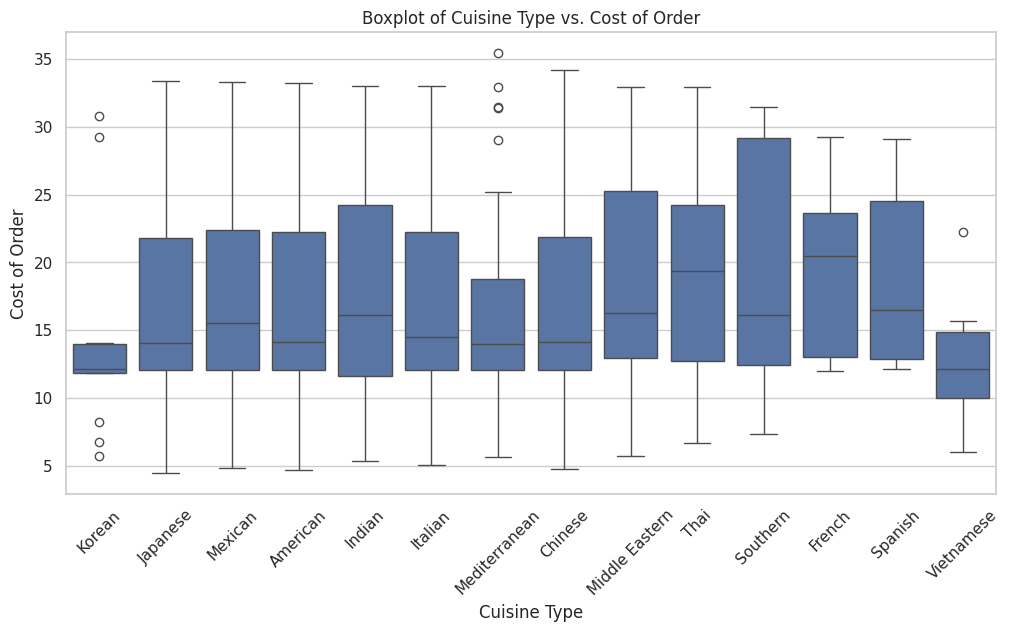

In [ ]:
# Plot boxplot Cost of Order vs Cuisine Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Boxplot of Cuisine Type vs. Cost of Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.xticks(rotation=45)
plt.show()

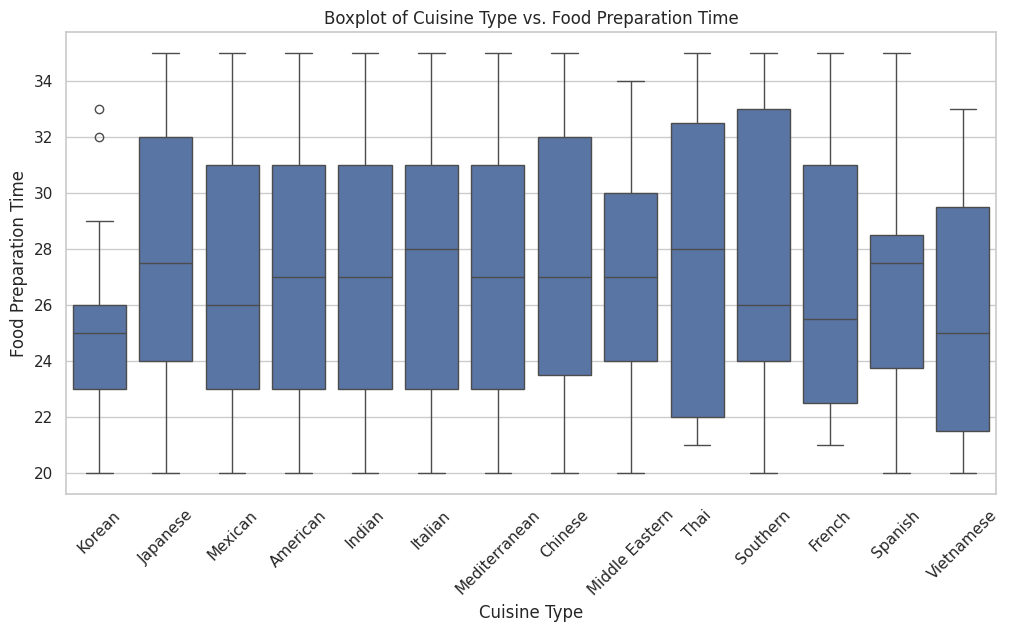

In [ ]:
# Plot boxplot Cuisine Type vs Food Preparation Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('Boxplot of Cuisine Type vs. Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=45)
plt.show()

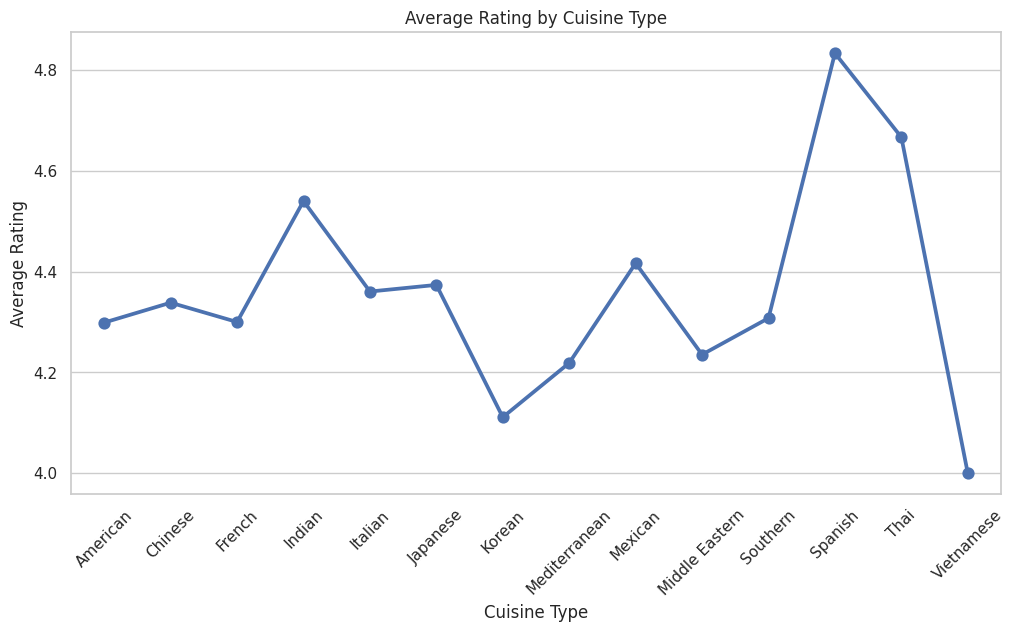

In [ ]:
# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing ratings
df = df.dropna(subset=['rating'])

# Aggregate ratings by cuisine type
ratings_by_cuisine = df.groupby('cuisine_type')['rating'].mean().reset_index()

# Plot point plot Cuisine Type vs Average Rating
plt.figure(figsize=(12, 6))
sns.pointplot(x='cuisine_type', y='rating', data=ratings_by_cuisine, ci=None)
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

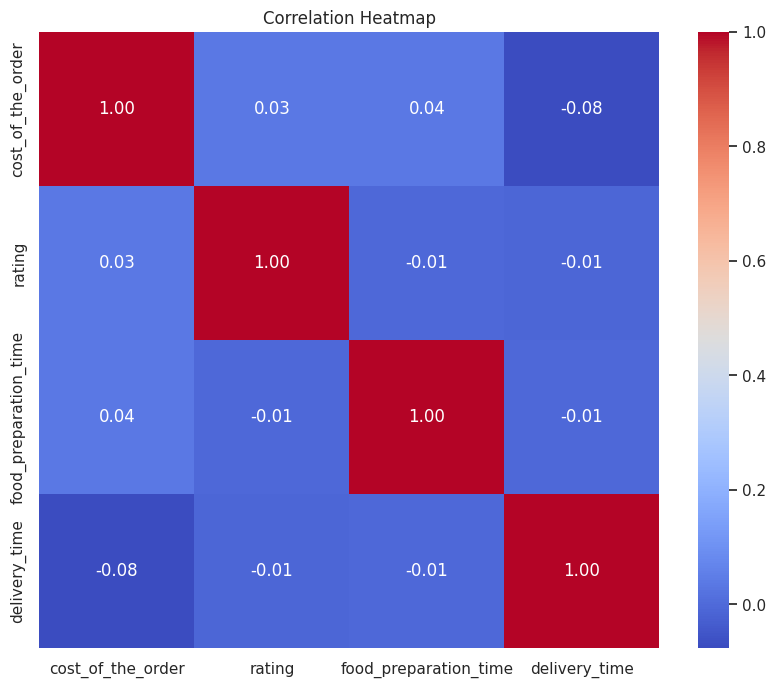

In [ ]:
# relevant columns
selected_columns = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
rated_restaurants = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
rated_restaurants['rating'] = rated_restaurants['rating'].astype('int')

# Group by restaurant name and calculate rating count and average rating
restaurant_stats = rated_restaurants.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Filter restaurants based on rating count and average rating criteria
promotional_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Display the restaurants fulfilling the criteria for the promotional offer
print(promotional_restaurants)

               restaurant_name  count      mean
16   Blue Ribbon Fried Chicken     64  4.328125
17           Blue Ribbon Sushi     73  4.219178
117                Shake Shack    133  4.278195
132          The Meatball Shop     84  4.511905


#### Observations:

Blue Ribbon Fried Chicken

*   Count: 64
*   Mean: 4.328125



Blue Ribbon Sushi                


*   Count: 73
*   Mean: 4.219178



Shake Shack                     
*   Count: 133
*   Mean: 4.278195
          
The Meatball Shop                

*   Count: 84
*   Mean: 4.511905



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_net_revenue(df):
    # Define the charges
    charge_25_percent = 0.25
    charge_15_percent = 0.15

    # Initialize total revenue
    total_revenue = 0

    # Iterate through each order
    for _, row in df.iterrows():
        # Check if the cost of the order is greater than $20
        if row['cost_of_the_order'] > 20:
            total_revenue += row['cost_of_the_order'] * charge_25_percent
        # Check if the cost of the order is greater than $5 but less than or equal to $20
        elif 5 < row['cost_of_the_order'] <= 20:
            total_revenue += row['cost_of_the_order'] * charge_15_percent

    return total_revenue

# Call the function to calculate net revenue
net_revenue = calculate_net_revenue(df)

# Print the net revenue generated
print("Net revenue generated by the company across all orders: ${:.2f}".format(net_revenue))

Net revenue generated by the company across all orders: $3865.57


#### Observations:
Net revenue generated by the company across all orders: $3,865.57

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#total time required for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# orders that exceed 60 minutes in total time
orders_exceeding_60_minutes = df[df['total_time'] > 60].shape[0]

#percentage of orders that exceed 60 minutes
percentage_orders_exceeding_60_minutes = (orders_exceeding_60_minutes / df.shape[0]) * 100

# Print the percentage
print("Percentage of orders taking more than 60 minutes for delivery: {:.2f}%".format(percentage_orders_exceeding_60_minutes))

Percentage of orders taking more than 60 minutes for delivery: 10.24%


#### Observations:
Percentage of orders taking more than 60 minutes for delivery: 10.24%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Separate data into weekdays and weekends
weekday_orders = df[df['day_of_the_week'] == 'Weekday']
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Calculate mean delivery time for weekdays and weekends
mean_delivery_time_weekdays = weekday_orders['delivery_time'].mean()
mean_delivery_time_weekends = weekend_orders['delivery_time'].mean()

# Print the results
print("Mean delivery time on weekdays:", mean_delivery_time_weekdays)
print("Mean delivery time on weekends:", mean_delivery_time_weekends)

Mean delivery time on weekdays: 28.305882352941175
Mean delivery time on weekends: 22.436739659367397


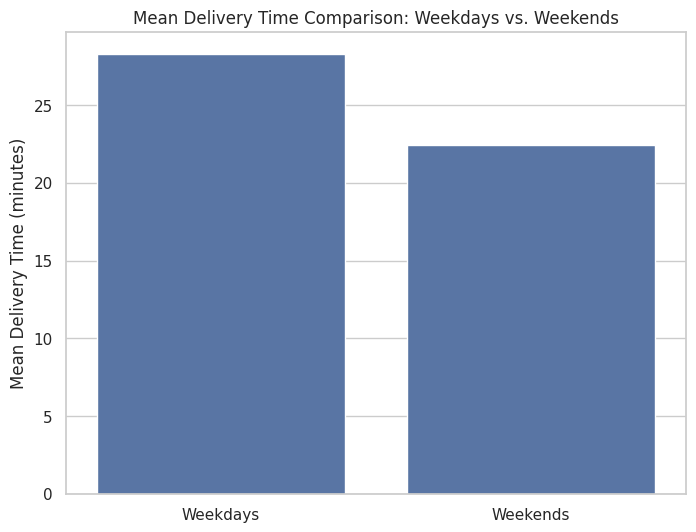

In [ ]:
# Separate data into weekdays and weekends
weekday_orders = df[df['day_of_the_week'] == 'Weekday']
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Calculate mean delivery time for weekdays and weekends
mean_delivery_time_weekdays = weekday_orders['delivery_time'].mean()
mean_delivery_time_weekends = weekend_orders['delivery_time'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Weekdays', 'Weekends'], y=[mean_delivery_time_weekdays, mean_delivery_time_weekends])
plt.title('Mean Delivery Time Comparison: Weekdays vs. Weekends')
plt.ylabel('Mean Delivery Time (minutes)')
plt.show()

#### Observations:
Mean delivery time on weekdays: 28.305882352941175

Mean delivery time on weekends: 22.436739659367397

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  **Top Restaurants Identification**: I identified the top restaurants based on their rating counts and average ratings. These restaurants are prime candidates for promotional offers and special advertising campaigns due to their popularity and positive feedback from customers.

2. **Revenue Generation**: Additional revenue can be generated by implementing differential pricing strategies based on order cost. Restaurants could be charged higher commission rates for higher-priced orders.

3. **Delivery Time Optimization**: Analysis of delivery times revealed variations between weekdays and weekends. We can optimize delivery operations by allocating more resources, such as delivery personnel and vehicles, during peak times to ensure timely deliveries, especially on weekends when demand is typically higher.

4. **Cuisine Type Analysis**: By analyzing the popularity of different cuisine types, we can tailor our marketing strategies to target specific customer preferences.

5. **Customer Feedback Utilization**: Feedback ratings provide valuable insights into customer satisfaction and preferences. Restaurants with high ratings can be highlighted in promotional materials to attract more customers.




### Recommendations:

*  **Promotional Offers**: Offer targeted promotional offers and advertising campaigns to top-rated restaurants to capitalize on their popularity and attract more customers.

2. **Differential Pricing**: Implement differential pricing strategies based on order cost to maximize revenue while remaining competitive in the market.

3. **Delivery Operations Optimization**: Optimize delivery operations by allocating resources strategically during peak times to ensure timely deliveries and improve customer satisfaction.

4. **Continuous Improvement**: Continuously monitor key performance indicators and leverage data-driven insights to make informed business decisions and drive long-term success in the food delivery industry.


---